# k-Nearest Neighbor (kNN)

Jonnatan Arias Garcia
jariasg@uniquindio.edu.co
jonnatan.arias@utp.edu.co

El clasificador kNN tiene dos etapa:

- Durante el entrenamiento, el clasificador toma los datos de entrenamiento y simplemente los recuerda

- Durante la prueba, kNN clasifica cada imagen de prueba comparándola con todas las imágenes de entrenamiento y transfiriendo las etiquetas de los k ejemplos de entrenamiento más similares

- El valor de k se valida cruzadamente

#Cifar10 Dataset

In [62]:
import tensorflow.keras.datasets.cifar10 as cifar10

# Cargar el conjunto de datos CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Definir etiquetas para las clases
labels = ['Avión', 'Automóvil', 'Ave', 'Gato', 'Ciervo', 'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del etiquetas de entrenamiento:", y_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)
print("Dimensiones del etiquetas de prueba:", y_test.shape)
print("Número de clases:", len(set(y_train.flatten())))
print("Clases:", labels)

Dimensiones del conjunto de entrenamiento: (50000, 32, 32, 3)
Dimensiones del etiquetas de entrenamiento: (50000, 1)
Dimensiones del conjunto de prueba: (10000, 32, 32, 3)
Dimensiones del etiquetas de prueba: (10000, 1)
Número de clases: 10
Clases: ['Avión', 'Automóvil', 'Ave', 'Gato', 'Ciervo', 'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']


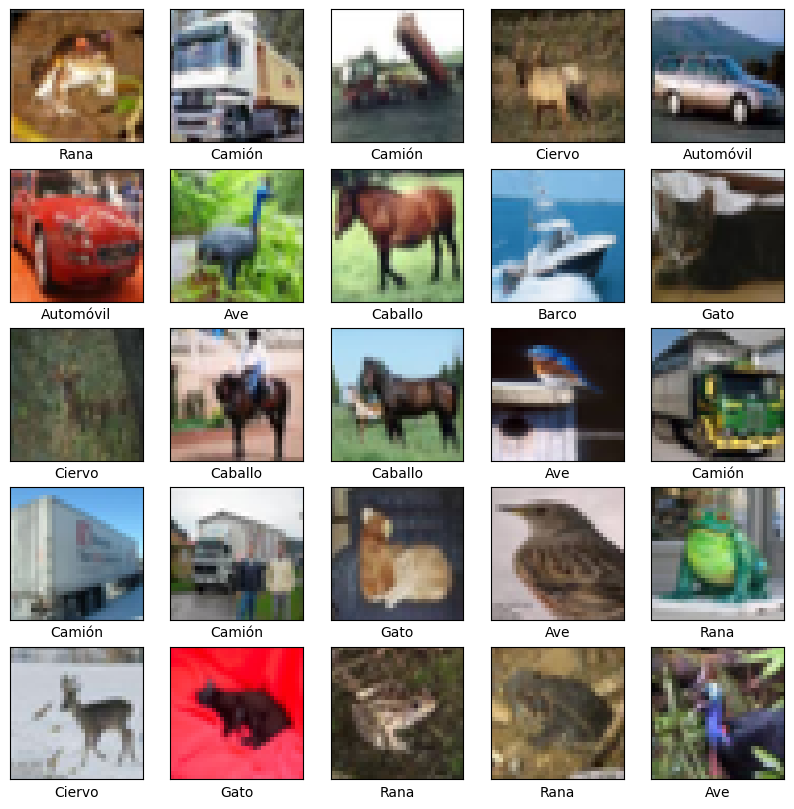

In [63]:
# Visualizar algunas imágenes del conjunto de datos
import matplotlib.pyplot as plt
# Mostrar algunas imágenes del conjunto de entrenamiento con sus etiquetas
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(labels[y_train[i][0]])
plt.show()

Para ser mas eficientes, utilizaremos solo 5000 para entrenamiento y 1000 para test

In [64]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

---
## kNN Model


Primero convertimos las imagenes en vectores (flatten)

In [65]:
import numpy as np
# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In [66]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=10)

# Parámetros principales que puedes ajustar:

# - n_neighbors:
#     Número de vecinos a considerar. Específicamente, es el valor de "k" en el algoritmo de k-vecinos más cercanos.
#     Valor predeterminado: 5.

# - weights:
#   Función de peso utilizada en las predicciones. Puede ser:
#     'uniform': Todos los vecinos tienen el mismo peso.
#     'distance': Los pesos son inversamente proporcionales a la distancia del punto de consulta.
#     Función personalizada definida por el usuario.
#     Valor predeterminado: 'uniform'.

# - metric:
#   Métrica de distancia utilizada para calcular la distancia entre puntos. Algunas opciones comunes incluyen:
#     'euclidean': Distancia euclidiana.
#     'manhattan': Distancia de Manhattan.
#     'minkowski': Distancia Minkowski (generalización de la distancia euclidiana y de Manhattan).
#     Valor predeterminado: 'minkowski'.

# - Algorithm:
#     Algoritmo utilizado para calcular los vecinos más cercanos. Puede ser:
#       'auto': Deja que el algoritmo elija el algoritmo más apropiado basado en los datos.
#       'ball_tree': Utiliza el algoritmo BallTree.
#       'kd_tree': Utiliza el algoritmo KDTree.
#       'brute': Realiza una búsqueda por fuerza bruta.
# Valor predeterminado: 'auto'.

# - leaf_size:
#     Tamaño de hoja pasado a los algoritmos BallTree o KDTree.
#     Valor predeterminado: 30.

#calculando las distancias
neigh = neigh.fit(X_train, y_train.ravel()) # con ravel quitamos dimension vacia a y



In [67]:
# Predecir con el clasificador entrenado
y_pred = neigh.predict(X_test)


# Evaluar el rendimiento del clasificador
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.282


In [68]:
# Obtener las distancias y los índices de los vecinos más cercanos para un punto de consulta
dists, indices = neigh.kneighbors(X_test)

# Imprimir las distancias y los índices de los vecinos más cercanos
print("Distancias de los vecinos más cercanos:")
print(dists)
print("Índices de los vecinos más cercanos:")
print(indices)

Distancias de los vecinos más cercanos:
[[2641.43408019 2707.54796818 2753.57930701 ... 2828.22329387
  2841.08535599 2846.54667975]
 [2858.06175581 2931.52008351 2957.80678882 ... 3159.93575884
  3162.32288042 3162.83306547]
 [2168.28273064 2315.13498527 2331.91809462 ... 2555.72435916
  2595.47375252 2646.59177056]
 ...
 [2888.33187151 2947.00169664 2955.5825145  ... 3116.02936443
  3173.69989129 3180.93115298]
 [1940.96805744 2001.41100227 2012.04671914 ... 2052.25022841
  2096.63063032 2123.69512878]
 [1869.68072141 2092.12380131 2152.68785475 ... 2378.93358461
  2394.22931233 2430.57729768]]
Índices de los vecinos más cercanos:
[[ 420 3684 4224 ... 1500  564 3218]
 [2192 4848 2166 ...  707  704  524]
 [4469  909 3904 ... 2003 2344 4226]
 ...
 [4398  765  349 ... 1243  129 3703]
 [4224 2875  933 ... 2776 4007 2310]
 [3979 3382 4645 ... 3357 2079 2460]]


### Distancias

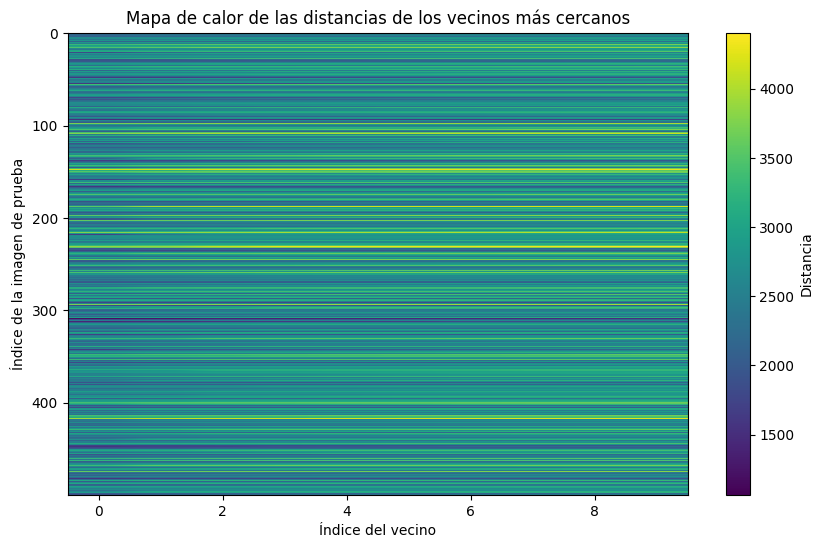

In [69]:
# Crear una matriz de distancias
distances_matrix = np.array(dists)

# Crear un mapa de calor de las distancias
plt.figure(figsize=(10, 6))
plt.imshow(distances_matrix, cmap='viridis', aspect='auto')
plt.colorbar(label='Distancia')
plt.xlabel('Índice del vecino')
plt.ylabel('Índice de la imagen de prueba')
plt.title('Mapa de calor de las distancias de los vecinos más cercanos')
plt.show()

Note que la matrix presenta cierto patron donde las franjas amarillas son distancias cercanas y azule alejadas.

Crees que podemos mejorar variando el K?


## Variando el K manualmente

Esperamos un rendimiento del `~27%` accuracy con K=10. intentemos con otra valor de `k`, digamos `k = 5`:

In [70]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh = neigh.fit(X_train, y_train.ravel())
# Predecir con el clasificador entrenado
y_pred = neigh.predict(X_test)

# Evaluar el rendimiento del clasificador
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.278


Mejoro?
Probemos con `k = 1`.

In [71]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh = neigh.fit(X_train, y_train.ravel())
# Predecir con el clasificador entrenado
y_pred = neigh.predict(X_test)

# Evaluar el rendimiento del clasificador
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.274


Mejoro?
Que tal si aplicamos validacion cruzada y probamos muchos valores de k usando una *grid*

### Cross-validation

In [72]:
num_folds = 5
k_choices = {'n_neighbors': [1, 5, 10, 50, 100]}
best_accuracy = 0
best_k = None


for k in k_choices['n_neighbors']:
    for fold in range(num_folds):
      # Crear el clasificador KNeighbors con el valor de k actual
      neigh = KNeighborsClassifier(n_neighbors=k)

      # Entrenar el clasificador
      neigh.fit(X_train, y_train.ravel())

      # Realizar predicciones en el conjunto de prueba
      y_pred = neigh.predict(X_test)

      # Calcular la precisión del clasificador
      accuracy = accuracy_score(y_test, y_pred)

      # Actualizar el mejor valor de precisión y el mejor valor de k encontrado hasta ahora
      if accuracy > best_accuracy:
          best_accuracy = accuracy
          best_k = k

      print(f'Valor de fold: {fold} Valor de k: {k}, Accuracy: {accuracy}' )

print("\n\nMejor valor de k encontrado:", best_k)
print("Accuracy:", best_accuracy)

Valor de fold: 0 Valor de k: 1, Accuracy: 0.274
Valor de fold: 1 Valor de k: 1, Accuracy: 0.274
Valor de fold: 2 Valor de k: 1, Accuracy: 0.274
Valor de fold: 3 Valor de k: 1, Accuracy: 0.274
Valor de fold: 4 Valor de k: 1, Accuracy: 0.274
Valor de fold: 0 Valor de k: 5, Accuracy: 0.278
Valor de fold: 1 Valor de k: 5, Accuracy: 0.278
Valor de fold: 2 Valor de k: 5, Accuracy: 0.278
Valor de fold: 3 Valor de k: 5, Accuracy: 0.278
Valor de fold: 4 Valor de k: 5, Accuracy: 0.278
Valor de fold: 0 Valor de k: 10, Accuracy: 0.282
Valor de fold: 1 Valor de k: 10, Accuracy: 0.282
Valor de fold: 2 Valor de k: 10, Accuracy: 0.282
Valor de fold: 3 Valor de k: 10, Accuracy: 0.282
Valor de fold: 4 Valor de k: 10, Accuracy: 0.282
Valor de fold: 0 Valor de k: 50, Accuracy: 0.252
Valor de fold: 1 Valor de k: 50, Accuracy: 0.252
Valor de fold: 2 Valor de k: 50, Accuracy: 0.252
Valor de fold: 3 Valor de k: 50, Accuracy: 0.252
Valor de fold: 4 Valor de k: 50, Accuracy: 0.252
Valor de fold: 0 Valor de k: 1

#### GridSearch

In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1, 5, 10, 50, 100]}


# Crear el clasificador KNeighbors
neigh = KNeighborsClassifier()


# Crear un objeto GridSearchCV
grid_search = GridSearchCV(neigh, param_grid, cv=5, scoring='accuracy')
#---------------------
# en neigh, variara los param_grid, 5(cv) veces por cada valor y buscara el mejor scoring

# Ejecutar la búsqueda en la grilla
grid_search.fit(X_train, y_train.ravel())

# Obtener los resultados
print("Mejor valor de k encontrado:", grid_search.best_params_)
# Predecir con el mejor modelo encontrado por la búsqueda en la grilla
best_neigh = grid_search.best_estimator_
y_pred = best_neigh.predict(X_test)
# Evaluar el rendimiento del clasificador
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Mejor valor de k encontrado: {'n_neighbors': 10}
Accuracy: 0.282


La busqueda en rejilla (gridsearch) encontro que el mejor parametro según los que le dimo, era 'n_neighbors': 10

¿Por que nunca mejoro del 20%?
¿El modelo es suficiente para describir imagenes?
¿Mas especificamente la distancia es una metrica suficiente para comparar imagenes (suma de pixeles imagen 1 - suma de pixeles en imagen 2)?

